# Modelos de Procesamiento de Datos de Movimiento

Autores: 

-Juan Sebastián Cely Botia

-Juan Carlos Ceron Lombana

-Juan Diego Díaz Guzmán
    
## Introducción

El modelo consiste en la captura y el procesamiento de datos de movimiento a partir de un dispositivo móvil para desarrollar un modelo de inteligencia artificial con capacidades de clasificación.

## Marco Teórico

### Arquitectura de Modelos:

MLP: El alto rendimiento del modelo MLP sugiere que puede estar capturando bien las relaciones lineales en los datos, o podría estar sobreajustándose. Revisa la complejidad del modelo y considera aplicar técnicas de regularización si es necesario.

Convolución 1D: Este modelo es útil para capturar patrones locales en series temporales. Si su rendimiento es bajo, puede deberse a la arquitectura específica (número y tamaño de los filtros, número de capas), la falta de regularización, o la necesidad de un preprocesamiento diferente.

Redes Recurrentes (RNN): Las RNN son adecuadas para datos secuenciales como los tuyos. Un rendimiento bajo podría deberse a la elección del tipo de RNN (por ejemplo, LSTM vs. GRU), el tamaño de las capas, o la necesidad de más datos para capturar dependencias temporales complejas.


## Descripción del problema a solucionar

Se pretende desarrollar un modelo de inteligencia artificial mediante redes neuronales que sea capaz de clasificar correctamente datos de movimiento capturados con un acelerómetro de un teléfono móvil para los siguientes movimientos: corriendo, caminando, reposo, arriba, abajo, ola, izquierda y derecha. Se pretende entrenar el modelo con las series de coordenadas espaciales etiquetadas y comprobar su precisión mediante métricas establecidas. 

## Planteamiento de la solución

### Planteamiento del Problema
El objetivo es desarrollar y evaluar modelos de aprendizaje automático capaces de clasificar correctamente las mediciones de acelerómetro en una de las 7 categorías (caminando, reposo, arriba, abajo, diagonal izquierda, diagonal derecha), basándose en la secuencia temporal de las mediciones tomadas a través de un acelerómetro. Este problema se encuadra dentro del ámbito del aprendizaje supervisado, específicamente en la clasificación multiclase de series temporales.

### Desafíos y Consideraciones Específicas
- Datos de Series Temporales: Dado que los datos provienen de acelerómetros y se registran en intervalos de tiempo, es crucial capturar la dependencia temporal entre las mediciones para una clasificación precisa.

- Diversidad de Modelos: La utilización de modelos basados en MLP, convolución 1D y redes recurrentes sugiere una exploración de diferentes arquitecturas para manejar la naturaleza secuencial y posiblemente las características espaciales de los datos.

- Variabilidad en el Rendimiento de los Modelos: La notable diferencia en el rendimiento entre los modelos MLP (superior al 95% de precisión) y los basados en convolución 1D y redes recurrentes (precisión muy baja) indica posibles áreas de mejora en la selección de características, arquitectura de modelos, ajuste de hiperparámetros o preprocesamiento de datos.

- Clasificación Multiclase: El problema involucra clasificar las mediciones en una de las 7 categorías, lo que requiere un enfoque cuidadoso en la selección de la función de pérdida, la estrategia de codificación de etiquetas (por ejemplo, one-hot encoding) y la evaluación del modelo (considerando métricas como la precisión, recall y puntuación F1 para cada clase).

### Posibles Direcciones
- Preprocesamiento y Extracción de Características: Examinar los datos para entender mejor las características distintivas de cada categoría y aplicar técnicas de preprocesamiento adecuadas para resaltar estas diferencias.

- Experimentación con Arquitecturas de Modelos: Dado el contraste en el rendimiento entre diferentes modelos, sería útil realizar una exploración más profunda para entender cómo cada arquitectura procesa la información temporal y espacial de los datos.

- Ajuste Fino y Optimización de Hiperparámetros: Implementar una búsqueda sistemática de hiperparámetros para cada modelo podría descubrir configuraciones que mejoren significativamente el rendimiento de los modelos de convolución 1D y redes recurrentes.

- Validación y Pruebas Rigurosas: Utilizar técnicas de validación cruzada y conjuntos de prueba independientes para evaluar la capacidad de generalización de los modelos y asegurar que las métricas de rendimiento reflejen la capacidad del modelo para clasificar nuevas mediciones correctamente.

## Librerías

In [1]:
# Librerías
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Input
from tensorflow.keras.layers import LSTM, Dense
from tensorflow import keras
import seaborn as sns
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam


### Cargar datos del objeto JSON

In [2]:
# Cargar datos desde el archivo JSON para analizar un solo objeto
path = '../data/motion/abajo-jc (7).json' # Path para GitHub

# Path para Google Colab
# Se da acceso al drive desde Colab
#from google.colab import drive
#drive.mount('/content/drive')
# path = "/content/drive/MyDrive/Colab Notebooks/Datos/Acelerometro/Motion/reposo-jc (7).json" 

with open(path, 'r') as file:
    datos_json = json.load(file)

# Extraer los valores de los sensores
valores_sensores = datos_json['payload']['values']

print("Valores de los sensores:")
print(valores_sensores)
np.array(valores_sensores).shape

Valores de los sensores:
[[-0.17492643186040222, -9.124452164459228, 1.282394191155955], [-0.08170220471806823, -8.626908301001787, 1.4318825957033783], [0.15322872358690948, -8.435221361541748, 1.3444927007377148], [0.2762309434752911, -8.28648158340454, 1.5557811433769761], [0.4291604649199173, -7.834875295257568, 2.151938525799662], [0.14859006746821105, -7.381323718261719, 2.161215764971822], [-0.0011972104279324412, -6.9584490190804, 1.9282304543092845], [-0.12524674741216002, -6.000018997955322, 1.5020621204100548], [-0.12285258228462188, -4.5585599609375, 0.8421595571771263], [0.012120463241450488, -3.8604999548763033, 0.5626363672234118], [0.09023140200190245, -1.9324200149536133, 0.13317790573760865], [0.48722011090703304, -0.51714755859375, 1.1194377446830273], [0.8246527064559049, -0.02483984222412109, 1.8291694838374852], [0.45235436656791717, 0.8559288470715284, 1.6995831728510558], [0.05087666654731147, 1.9318208800166845, 0.26815058593749996], [-0.2937386801125016, 2.755

(62, 3)

In [3]:
# Carga los archivos de movimiento
import os
"""
Función para crear una lista con los nombres de archivo 
de movimiento presentes en la ruta especificada. Además, se 
extrae las clases de cada audio.
"""
def listFiles(path):
    motionfiles = []
    targets = []
    for fileName in os.listdir(path):
        motionfiles.append(fileName)
        targets.append(fileName.split("-")[0])
    return motionfiles, targets

# Carga de los archivos de movimiento

path = "../data/motion" 
archivos, Y = listFiles(path)
print(len(archivos))
print(len(Y))
Y = np.array(Y)
Y.shape

112
112


(112,)

In [4]:
# Modelo ajustado
X = np.zeros((len(archivos),62, 3))
# Carga y generación de clases de cada archivo de movimiento
for i, archivo in enumerate(archivos):
    with open(os.path.join(path, archivo), 'r') as f:
        datos_json = json.load(f)
        mov_motion = datos_json['payload']['values']
        mov_motion = np.array(mov_motion)
        X[i,:,:] = mov_motion 
         
print(X.shape)
print(Y.shape)

(112, 62, 3)
(112,)


### Visualización de datos iniciales

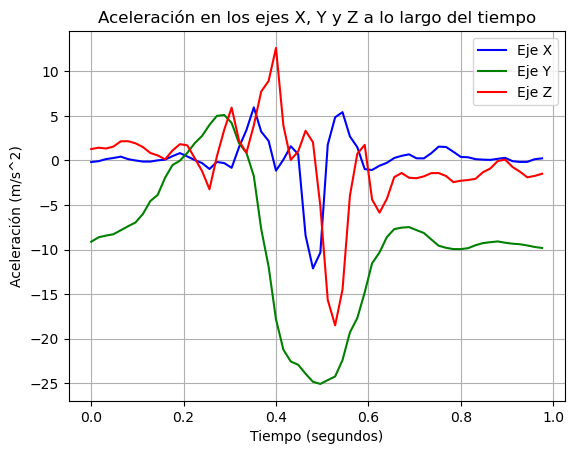

In [5]:
# Obtener los valores de la aceleración en el eje X, Y y Z
valores_x = [dato[0] for dato in valores_sensores]
valores_y = [dato[1] for dato in valores_sensores]
valores_z = [dato[2] for dato in valores_sensores]

# Crear una lista de tiempos para cada punto de datos
# Suponiendo que los datos se registraron a intervalos regulares de 16 ms
tiempos = [i * 0.016 for i in range(len(valores_x))]

# Trazar los valores de la aceleración en el eje X, Y y Z con respecto al tiempo
plt.plot(tiempos, valores_x, label='Eje X', color='blue')
plt.plot(tiempos, valores_y, label='Eje Y', color='green')
plt.plot(tiempos, valores_z, label='Eje Z', color='red')

plt.xlabel('Tiempo (segundos)')
plt.ylabel('Aceleración (m/s^2)')
plt.title('Aceleración en los ejes X, Y y Z a lo largo del tiempo')
plt.grid(True)
plt.legend()
plt.show()


### Análisis de patrones de movimiento

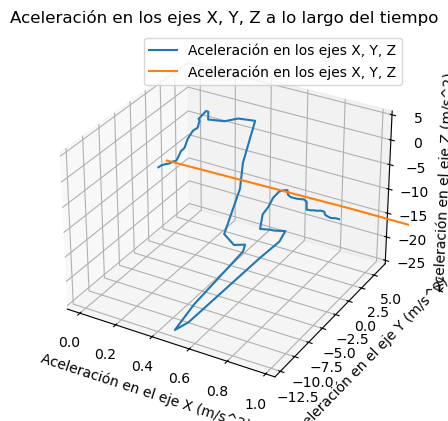

In [6]:

# Obtener los valores de aceleración en los ejes X, Y, Z
valores_x = [dato[0] for dato in valores_sensores]
valores_y = [dato[1] for dato in valores_sensores]
valores_z = [dato[2] for dato in valores_sensores]

# Crear una lista de tiempos para cada punto de datos
# intervalos regulares de 16 ms
tiempos = [i * 0.016 for i in range(len(valores_x))]

# Trazar la aceleración en los ejes X, Y, Z en una gráfica tridimensional
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(tiempos, valores_x, valores_y, valores_z, label='Aceleración en los ejes X, Y, Z')
ax.set_xlabel('Aceleración en el eje X (m/s^2)')
ax.set_ylabel('Aceleración en el eje Y (m/s^2)')
ax.set_zlabel('Aceleración en el eje Z (m/s^2)')
plt.title('Aceleración en los ejes X, Y, Z a lo largo del tiempo')
plt.grid(True)
plt.legend()
plt.show()

## Preparación los datos

In [7]:
# Se realiza dos operaciones principales relacionadas con el procesamiento de datos, 
# típicamente en el contexto de preparar datos para análisis o modelado en aprendizaje automático. 
# Aquí está la explicación paso a paso:

# 1. Creación de una lista de tuplas a partir de tres listas de valores (valores_x, valores_y, valores_z):

valores_sensores = list(zip(valores_x, valores_y, valores_z))

# 2. Conversión de la lista de tuplas a un array de NumPy:

datos = np.array(valores_sensores)  

## Escalar los datos

In [8]:
# 1. Instanciación de MinMaxScaler

# Se creas una instancia de MinMaxScaler. Puedes especificar el rango al que deseas escalar 
# las características mediante los parámetros feature_range, que por defecto es (0, 1)

scaler = MinMaxScaler()

# 2. Ajuste y transformación de los datos:

# El resultado, datos_escalados, es una versión escalada 
# de datos, donde cada característica ahora tiene valores entre 0 y 1.


datos_escalados = scaler.fit_transform(datos)

## Visualizar los datos escalados


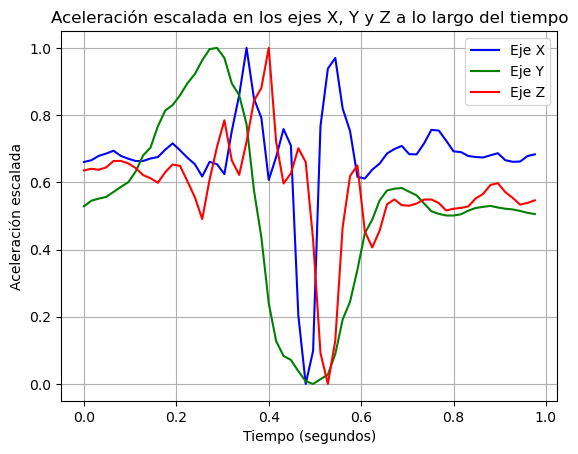

In [9]:
# Descomponer los datos escalados por eje para su visualización

# Se extrae columnas individuales del array datos_escalados, que ha sido previamente escalado 
# utilizando el MinMaxScaler. Las operaciones realizadas separan las características escaladas
# (en este caso, correspondientes a mediciones en los ejes X, Y y Z de un conjunto de sensores) 
# en arrays separados. Veamos en detalle:


datos_x_escalados = datos_escalados[:, 0]
datos_y_escalados = datos_escalados[:, 1]
datos_z_escalados = datos_escalados[:, 2]

# Crear los tiempos para cada punto de datos

tiempos = [i * 0.016 for i in range(len(datos_x_escalados))]

# Trazar los valores de la aceleración escalados en el eje X, Y y Z con respecto al tiempo
plt.plot(tiempos, datos_x_escalados, label='Eje X', color='blue')
plt.plot(tiempos, datos_y_escalados, label='Eje Y', color='green')
plt.plot(tiempos, datos_z_escalados, label='Eje Z', color='red')

plt.xlabel('Tiempo (segundos)')
plt.ylabel('Aceleración escalada')
plt.title('Aceleración escalada en los ejes X, Y y Z a lo largo del tiempo')
plt.grid(True)
plt.legend()
plt.show()


## Creación de ventanas

### Definición de los parámetros de la ventana

In [10]:
#Definir los patametros de la ventana

tamaño_ventana = 10  # Por ejemplo, 10 mediciones consecutivas
paso_ventana = 1     # Cada ventana comienza 1 paso después de la anterior


### Creación de las ventanas

In [11]:
#Creación de las ventanas

# La función crear_ventanas definida en el fragmento de código tiene como objetivo generar 
# un conjunto de ventanas (o subsecuencias) a partir de una serie temporal o secuencia de datos.

# El bucle for itera desde 0 hasta n_muestras (sin incluirlo), incrementando en paso_ventana en 
# cada iteración. Para cada iteración:

# Se calcula el índice fin de la ventana actual como inicio + tamaño_ventana.
# Se extrae la subsecuencia (o ventana) de datos desde el índice inicio hasta el 
# índice fin (sin incluir fin).
# Esta subsecuencia se añade a la lista X.

# Finalmente, se convierte la lista X en un array de NumPy y se retorna. Cada elemento de este array 
# es una ventana generada a partir de datos.

def crear_ventanas(datos, tamaño_ventana, paso_ventana):
    X = []
    n_muestras = len(datos) - tamaño_ventana + 1
    for inicio in range(0, n_muestras, paso_ventana):
        fin = inicio + tamaño_ventana
        ventana = datos[inicio:fin]
        X.append(ventana)
    return np.array(X)

### Aplicar la función de los datos simulados

In [12]:
# Aplicar la función a los Datos simulados

# Se generan tres arrays de NumPy, cada uno conteniendo 100 números aleatorios distribuidos 
# uniformemente entre 0 y 1. Esto se hace mediante el uso de np.random.rand(100), que es 
# una función de la biblioteca NumPy diseñada para generar muestras de una distribución uniforme 
# en el intervalo [0, 1).

valores_x = np.random.rand(100)
valores_y = np.random.rand(100)
valores_z = np.random.rand(100)

# Combinar en un único array de (n_muestras, n_canales)

# Se combina los tres arrays de NumPy valores_x, valores_y, y valores_z en un solo array bidimensional, 
# donde cada uno de estos arrays originales se convierte en una columna del nuevo array datos.

datos = np.column_stack((valores_x, valores_y, valores_z))

# Crear ventanas

# La función generará un nuevo conjunto de datos X_train, que estará compuesto por múltiples 
# ventanas extraídas de datos, cada una con una longitud definida por tamaño_ventana y separadas
# por un intervalo definido por paso_ventana.

X_train = crear_ventanas(datos, tamaño_ventana, paso_ventana)

### Dimensiones

In [13]:
# Verificar las dimensiones

print("Forma de la entrada de entrenamiento:", X_train.shape)


Forma de la entrada de entrenamiento: (91, 10, 3)


### Visualizar patrón de entrenamiento

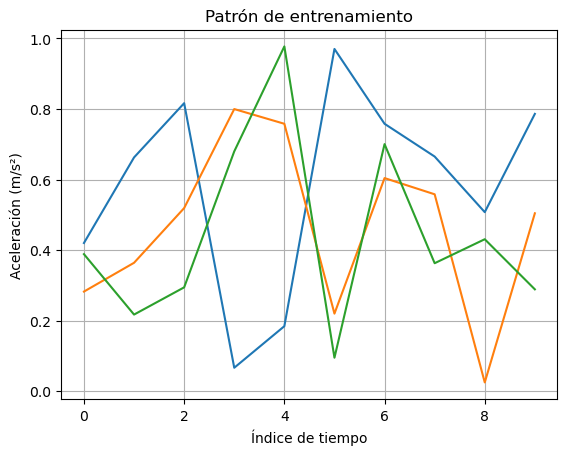

In [14]:
#Visualizar patrón de entrenamiento

# Visualizar la muestra número 10 del conjunto de entrenamiento
plt.plot(X_train[10,:,:])
plt.xlabel('Índice de tiempo')
plt.ylabel('Aceleración (m/s²)')
plt.title('Patrón de entrenamiento')
plt.grid(True)
plt.show()

## Modelo basado en MLP

In [15]:
# Visualización de dimensiones y categorias MLP

# Instanciación y ajusta de LabelEncoder()

# 1.  sklearn.preprocessing. Este codificador se utiliza para transformar etiquetas 
# categóricas (que pueden ser cadenas de texto o números en formato no secuencial) en etiquetas 
# numéricas con un valor entero único para cada clase.

encoder = LabelEncoder()

# Ajusta el codificador a las etiquetas Y, lo que significa que encoder aprende el conjunto de 
# etiquetas que debe transformar. Y debería ser un array o lista con las etiquetas de 
# cada muestra en tus datos.

encoder.fit(Y)

# 2. Transformación de etiquetas

# Transforma las etiquetas Y a una forma codificada numéricamente, donde cada etiqueta categórica 
# se reemplaza por un número entero. 
Y_encoded = encoder.transform(Y)

# 3. Conversión a codificación "one-hot":

# Convierte las etiquetas numéricas en vectores "one-hot". En la codificación "one-hot", 
# cada etiqueta se representa como un vector donde todos los elementos son 0 excepto el 
# índice que corresponde a la clase, que es 1. 

Y_encoded = keras.utils.to_categorical(Y_encoded)

# 4. Verificación de la forma de Y_encoded:
Y_encoded.shape

(112, 7)

### División de datos de entrenamiento y prueba MLP

In [ ]:
# Dividir los datos en entrenamiento y prueba MLP

# La función train_test_split de sklearn.model_selection para dividir los conjuntos de 
# datos X y Y_encoded en subconjuntos de entrenamiento y prueba. Esto es un paso crucial 
# en la preparación de datos para el entrenamiento y evaluación de modelos de aprendizaje 
# automático y redes neuronales.

# Función train_test_split

# X: Este es el conjunto de características o datos de entrada que quieres dividir. 
# X podría ser un conjunto de ventanas generadas a partir de una serie de tiempo o 
# cualquier otro tipo de datos estructurados adecuados para el aprendizaje automático.

# Y_encoded: Este es el conjunto de etiquetas o respuestas asociadas a cada entrada en X, 
# ya procesadas mediante codificación de etiquetas y codificación one-hot para adaptarse 
# a tareas de clasificación multiclase en redes neuronales.

# test_size=0.2: Este parámetro especifica la proporción del conjunto de datos que se asignará 
# al conjunto de prueba. En este caso, 0.2 significa que el 20% de los datos se reservarán 
# para pruebas, mientras que el restante 80% se utilizará para entrenamiento.

# random_state=42: Este parámetro es una semilla para el generador de números aleatorios. 
# Proporcionar un número fijo (como 42, que es un valor comúnmente usado por convención) 
# asegura que los resultados sean reproducibles; es decir, cada vez que ejecutes esta función 
# con el mismo estado aleatorio y los mismos datos de entrada, obtendrás la misma división 
# exacta de los datos. 

X_train, X_test, y_train, y_test = train_test_split(
    X, Y_encoded, test_size=0.2, random_state=42
)

# Salida de train_test_split
# La función devuelve cuatro arrays:

# - X_train: Las características de entrenamiento. Será el 80% de X, dado que test_size=0.2.
# - X_test: Las características de prueba. Este conjunto es el 20% restante de X.
# - y_train: Las etiquetas de entrenamiento correspondientes a X_train.
# - y_test: Las etiquetas de prueba correspondientes a X_test.

# Definir el modelo MLP

# Se define un modelo de clasificador de perceptrón multicapa (MLPClassifier) utilizando 
# la biblioteca sklearn.neural_network. Este tipo de modelo es una forma de red neuronal 
# artificial que se compone de múltiples capas de nodos o "neuronas", cada una de las cuales 
# aplica una función de activación (en este caso, "ReLU") después de sumar ponderadamente sus entradas.

# Parámetros de MLPClassifier
# - hidden_layer_sizes=(100, 50): Define el tamaño de las capas ocultas del MLP. En este caso, 
# el modelo tendrá dos capas ocultas: la primera con 100 neuronas y la segunda con 50 neuronas. 
# La cantidad y tamaño de las capas ocultas son hiperparámetros clave que pueden influir 
# significativamente en el rendimiento del modelo.

# activation="relu": Establece la función de activación para las capas ocultas. "relu" se refiere 
# a la función de activación Rectified Linear Unit, que es comúnmente utilizada por su eficiencia 
# y eficacia en modelos de redes neuronales. Esta función devuelve 0 para cualquier entrada negativa 
# y para entradas positivas, devuelve el valor sin cambios.

# solver="adam": Especifica el algoritmo de optimización para ajustar los pesos del modelo. 
# "adam" es un algoritmo basado en la estimación adaptativa de momentos de primer y segundo orden.

# max_iter=1000: Determina el número máximo de iteraciones o épocas sobre el conjunto de datos de 
# entrenamiento. Esto es, cuántas veces el algoritmo de aprendizaje pasará a través del conjunto de 
# entrenamiento completo antes de detenerse. Un número más alto permite más oportunidades para que 
# el modelo aprenda, pero también aumenta el riesgo de sobreajuste y el tiempo de computación.

# random_state=42: Fija la semilla del generador de números aleatorios a 42 para reproducibilidad. 
# Esto asegura que los resultados sean consistentes en múltiples ejecuciones, lo cual es útil para la 
# comparación de modelos o la demostración de resultados.

# verbose=1: Habilita la salida detallada durante el entrenamiento. Esto te permite observar el progreso 
# del entrenamiento del modelo, incluyendo la convergencia y el ajuste de los parámetros a lo largo de 
# las iteraciones.

model = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation="relu",
    solver="adam",
    max_iter=1000,
#    tol=0.001,  # Incrementar la tolerancia
    n_iter_no_change=40,  # Aumentar el número de iteraciones sin cambio
    random_state=42,
    verbose=1,
)

# Entrenar el modelo

# X_train.reshape(X_train.shape[0], -1) cambia la forma de X_train a un formato que es compatible con 
# MLPClassifier. La operación .reshape() en NumPy permite cambiar la forma de un array sin cambiar 
# sus datos. Aquí, X_train.shape[0] se refiere al número total de muestras en X_train, y -1 le dice 
# a NumPy que calcule automáticamente el número de columnas necesario para mantener la misma 
# cantidad de datos.

# Específicamente, este paso convierte X_train de un array posiblemente multidimensional 
# (por ejemplo, si X_train viene de datos de series temporales segmentadas o imágenes) a un array 
# bidimensional donde cada fila representa una muestra y cada columna una característica. 
# Esto es necesario porque MLPClassifier espera entradas en forma de un array bidimensional 
# (n_samples, n_features).

model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Hacer predicciones en el conjunto de prueba

# Se utiliza el método .predict() del modelo MLPClassifier previamente entrenado para hacer 
# predicciones sobre el conjunto de prueba X_test

# X_test.reshape(X_test.shape[0], -1): Cambia la forma de X_test a un formato bidimensional donde 
# cada fila representa una muestra y cada columna una característica, independientemente de la 
# forma original de X_test. Esto es necesario porque MLPClassifier, como la mayoría de los modelos 
# de aprendizaje automático en scikit-learn, espera entradas en esta forma. 
# La operación .reshape(X_test.shape[0], -1) garantiza que cada muestra sea aplanada en un vector 
# único de características.

# model.predict(...): Utiliza el modelo MLPClassifier entrenado para hacer predicciones sobre las 
# muestras en X_test, ahora reestructuradas. Para cada muestra en X_test, model.predict devuelve la 
# clase que el modelo predice como la más probable.

y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))

# Calcular el error cuadrático medio

from sklearn.metrics import mean_squared_error

# Asumiendo que y_test es un array de etiquetas verdaderas y y_pred es un array de etiquetas predichas por el modelo
# Ambos deberían estar codificados de manera similar, por ejemplo, como enteros o one-hot encoding

# Si y_test está en formato one-hot, primero debes convertirlo a etiquetas enteras
# y_test_encoded = np.argmax(y_test, axis=1) si y_test es one-hot encoded

# Calcula el MSE
mse = mean_squared_error(y_test, y_pred)
print("Error Cuadrático Medio (MSE):", mse)


### Muestra de la arquitectura utilizada MLP

In [ ]:
# Muestra de la arquitectura utilizada MLP

# Si realmente necesitas una función de resumen, puedes crear una función personalizada que imite 
# el comportamiento de .summary() para modelos de scikit-learn.

def print_model_summary(model):
    print("Model Summary\n-------------")
    print(f"Number of Layers: {len(model.coefs_)}")
    for i, (coef, intercept) in enumerate(zip(model.coefs_, model.intercepts_), start=1):
        print(f"Layer {i} -> Weights: {coef.shape[0]}, Biases: {intercept.shape[0]}")
    total_params = sum(coef.size + intercept.size for coef, intercept in zip(model.coefs_, model.intercepts_))
    print(f"Total Parameters: {total_params}")


#Representación gráfica del modelo

# Configura aquí la arquitectura de tu MLP basándote en tu modelo scikit-learn
# Por ejemplo, si tu MLPClassifier tenía hidden_layer_sizes=(100, 50)
modelo_keras = Sequential()
modelo_keras.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))  # Capa de entrada + primera capa oculta
modelo_keras.add(Dense(50, activation='relu'))  # Segunda capa oculta
# Asegúrate de ajustar la cantidad de neuronas en la capa de salida y la función de activación según tu caso de uso
modelo_keras.add(Dense(y_train.shape[1], activation='softmax'))  # Capa de salida

# Ver la arquitectura del modelo
modelo_keras.summary()

# Guardar la visualización del modelo
plot_model(modelo_keras, to_file='model_plot_keras_version.png', show_shapes=True, show_layer_names=True)


### Optimización de Hiperparametros MLP

In [18]:
# Optimización del hiperparametros MLP
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'max_iter': [300, 400, 500],  # Ejemplos de valores mayores
    'learning_rate_init': [0.01, 0.01, 0.0001], # nuevo
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}


### Búsqueda de mejores hiperparámetros para optimizar el rendimiento MLP

In [ ]:
# Búsqueda de mejores hiperparámetros MLP
#Utilizar RandomizedSearchCV
model = MLPClassifier(max_iter=200, random_state=42)

# Inicializar RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, cv=5, random_state=42)

# Realizar la búsqueda aleatoria
random_search.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)


### Refinamiento del Modelo MLP

In [ ]:
# Refinamiento del Modelo MLP
refined_model = MLPClassifier(hidden_layer_sizes=(200, 100), activation='relu', solver='adam', alpha=0.001, learning_rate='adaptive', max_iter=1000, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
refined_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_refined = refined_model.predict(X_test.reshape(X_test.shape[0], -1))


# Calcular la precisión dentro de una cierta tolerancia 
tolerance = 0.1
accuracy = np.mean(np.abs(y_pred_refined - y_test) <= tolerance) * 100
print("Precisión dentro de una tolerancia de", tolerance, ":", accuracy, "%")

# Calcular perdida del modelo MLP
loss_refined = refined_model.loss_
print("Pérdida del modelo MLPRegressor:", loss_refined)

### Compilación de los Modelos MLP

In [21]:
# Compilación del modelo MLP
# Necesitas aplanar los datos para que tengan forma (n_samples, n_timesteps * n_features)

X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Ahora puedes usar X_train_flattened y X_test_flattened con modelos que esperan datos de dos dimensiones
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, alpha=0.01, solver='adam', random_state=42)

# No hay necesidad de compilar, directamente entrenas el modelo con tus datos

### Entrenamiento del modelo MLP

In [ ]:
# Entrenamiento del modelo MLP
model.fit(X_train_flattened, y_train)


#historia = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))



### Cálculo del error cuadrático MLP

In [ ]:
# Cálculo del error cuadrático 

# Asegurándote de que tienes tus conjuntos de datos X_train y y_train definidos correctamente# Asumiendo que ya has aplanado X_test como X_test_flattened
y_pred = model.predict(X_test_flattened)

# Si estás trabajando en un problema de clasificación y model.predict() te da clases directamente, esto es lo que necesitas.
# Si model.predict() te da probabilidades y estás en un contexto de clasificación, podrías necesitar convertir estas probabilidades a clases.
# Por ejemplo, para una clasificación binaria:
# y_pred_classes = (y_pred > 0.5).astype(int)

# Para un problema de regresión o si tus etiquetas están en el formato adecuado, calcula el MSE directamente
mse = mean_squared_error(y_test, y_pred)

print("Error cuadrático medio:", mse)

### Cálculo de las métricas de precisión y matriz de confusión MLP

In [ ]:
# Cálculos de las metrícas de precisión y matriz de confusión MLP
# Aplanar los datos de entrada para que sean bidimensionales
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Realizar predicciones con el modelo ya aplanado
predicciones_probabilidades = model.predict(X_test_flattened)

# El resto de tu código para calcular precisión y matriz de confusión puede permanecer igual,
# asumiendo que tus etiquetas `y_test` ya están en el formato correcto para ser comparadas con `predicciones_etiquetas`.

# Convertir las probabilidades en etiquetas predichas tomando la clase con la mayor probabilidad
predicciones_etiquetas = np.argmax(predicciones_probabilidades, axis=1)

# Si tus etiquetas verdaderas (y_test) están en formato one-hot, también necesitas convertirlas a etiquetas enteras
etiquetas_verdaderas = np.argmax(y_test, axis=1)

# Cálculo de la precisión
precision = accuracy_score(etiquetas_verdaderas, predicciones_etiquetas)
print(f'Precisión: {precision}')

# Cálculo de la matriz de confusión
matriz_confusion = confusion_matrix(etiquetas_verdaderas, predicciones_etiquetas)
print('Matriz de confusión:')
print(matriz_confusion)

# Visualización de la matriz de confusión como un mapa de calor
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')
plt.show()

## Modelo de Convolución en 1D

In [ ]:
# Definir las variables longitud_secuencia y numero_canales
longitud_secuencia = X_train.shape[1]  # Longitud de la secuencia
numero_canales = X_train.shape[2]      # Número de canales

# Inicializar el modelo secuencial
model = Sequential()

# Agregar una capa de entrada con las dimensiones adecuadas
model.add(Input(shape=(longitud_secuencia, numero_canales)))
# Agregar una capa de convolución 1D

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

# Agregar una capa de pooling
model.add(MaxPooling1D(pool_size=2))

# Agregar una capa de aplanado
model.add(Flatten())

# Agregar una capa densa para la salida
model.add(Dense(50, activation='relu'))
model.add(Dense(1))  # Capa de salida para regresión

model.summary()

keras.utils.plot_model(model, to_file='model_Conv1D.png', show_shapes=True, show_layer_names=True)


## Modelo de redes recurrentes (RNN/LSTM) en TensorFlow/Keras

In [ ]:
# Definir las variables según el RNN

# Dividir los datos en entrenamiento y prueba

# Este fragmento de código utiliza la función train_test_split de la biblioteca scikit-learn 
# para dividir arrays o matrices en subconjuntos aleatorios de entrenamiento y prueba. 
# Del conjunto de datos que se asignará al conjunto de prueba. En este caso, 0.2 significa 
# que el 20% de los datos se usarán para el conjunto de prueba, mientras que el resto (80%) 
# se utilizará para el conjunto de entrenamiento. Con una aleatoriedad de dividión de 42 datos.

X_train, X_test, y_train, y_test = train_test_split(
    X, Y_encoded, test_size=0.2, random_state=42
)

input_shape = (62, 3)  # 62 pasos de tiempo con 3 características cada uno


# Este fragmento de código define un modelo de red neuronal utilizando Keras, una API de 
# alto nivel para construir y entrenar modelos de deep learning en TensorFlow. 
# La red está compuesta por dos capas de RNN (Red Neuronal Recurrente) seguidas 
# por una capa densa.

model = Sequential()
model.add(keras.layers.SimpleRNN(50, input_shape=input_shape, return_sequences=True))
model.add(keras.layers.SimpleRNN(50, input_shape=input_shape, return_sequences=True))
model.add(keras.layers.SimpleRNN(50))
model.add(keras.layers.Dense(7))

# Se muestra la estructura del modelo 

model.summary()

# Se guarda el modelo en un archivo .png

keras.utils.plot_model(model, to_file='model_RNN.png', show_shapes=True, show_layer_names=True)

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_51 (LSTM)              (None, 62, 50)            10800     
                                                                 
 lstm_52 (LSTM)              (None, 62, 50)            20200     
                                                                 
 lstm_53 (LSTM)              (None, 50)                20200     
                                                                 
 dense_35 (Dense)            (None, 7)                 357       
                                                                 
Total params: 51,557
Trainable params: 51,557
Non-trainable params: 0
_________________________________________________________________


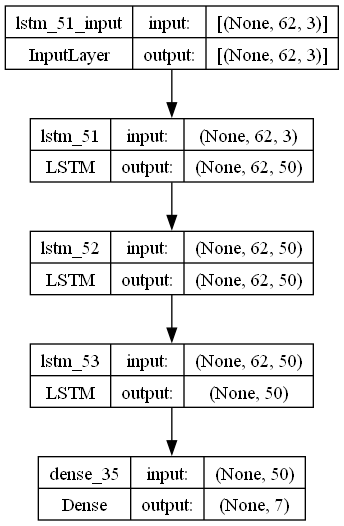

In [189]:
# Definir las variables según el LSTM

# Dividir los datos en entrenamiento y prueba 

X_train, X_test, y_train, y_test = train_test_split(
    X, Y_encoded, test_size=0.2, random_state=42
)

input_shape = (62, 3)  # 62 pasos de tiempo con 3 características cada uno

# Este código define un modelo secuencial en Keras utilizando capas LSTM y 
# una capa densa final. Está diseñado para tareas que involucran datos secuenciales,

model = Sequential([
    LSTM(50, activation='relu', input_shape=input_shape, return_sequences=True),
    LSTM(50, activation='relu', return_sequences=True),
    # Tercera y última capa LSTM: Aquí puede ser return_sequences=False ya que la siguiente capa es densa
    LSTM(50, activation='relu', return_sequences=False),
    # Capa de salida: Ajusta el número de neuronas y la función de activación según tu caso de uso
    
    # La función de activación softmax se utiliza para obtener una distribución de probabilidad 
    # sobre las 7 clases, lo que es común en problemas de clasificación multiclase.
    
    Dense(7, activation='softmax')
])

# Se muestra la estructura del modelo
model.summary()

# Se guarda la estrucutra del model en un archivo .png

keras.utils.plot_model(model, to_file='model_LSTM.png', show_shapes=True, show_layer_names=True)


### Evaluación del Modelo recurrente


In [190]:
# Verificación de X_test y Y_test

print(X_test.shape)  # Debería mostrar (n_samples, n_timesteps, n_features)
print(y_test.shape)  # Debería mostrar (n_samples,) o (n_samples, n_outputs) dependiendo de tu tarea

(23, 62, 3)
(23, 7)


In [191]:
# Verificación de número de predicciónes sea el número de muestras
predicciones = model.predict(X_test)
print(predicciones.shape)  # Debería mostrar (n_samples,) o (n_samples, n_outputs)


1/1 [==============================] - 1s 692ms/step
(23, 7)


In [192]:
# Evaluación del modelo RNN

# Asegúrate de que X_test ya tiene la forma correcta (None, 62, 7)
# Si X_test ya está en la forma correcta, simplemente comenta o elimina la línea de aplanamiento

# Calcular el MSE utilizando las predicciones y las etiquetas verdaderas
mse = mean_squared_error(y_test, predicciones)

print("Error cuadrático medio:", mse)


Error cuadrático medio: 0.19743122


### Compilación Modelo de redes recurrentes RNN/LSTM

In [193]:
# Compilación del modelo de redes recurrentes RNN - LSTM
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
print("Modelo compilado")

Modelo compilado


### Entrenamiento del modelos de redes recurrentes (RNN/LSTM)

In [194]:
# Entrenamiento del modelo de redes recurrentes

# Si X_train es un DataFrame o un array similar:
X_train_aligned = X_train[:min(len(X_train), len(y_train))]
y_train_aligned = y_train[:min(len(X_train), len(y_train))]

# Hacer lo mismo para X_test y y_test si es necesario
X_test_aligned = X_test[:min(len(X_test), len(y_test))]
y_test_aligned = y_test[:min(len(X_test), len(y_test))]

# Entrenamiento del modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


# Ahora deberías poder entrenar tu modelo sin el error
#historia = model.fit(X_train_aligned, y_train_aligned, epochs=10, batch_size=32, validation_data=(X_test_aligned, y_test_aligned))


historia = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
3/3 [==============================] - 9s 1s/step - loss: 5.6508 - accuracy: 0.0674 - val_loss: 2.2115 - val_accuracy: 0.0000e+00
Epoch 2/10
3/3 [==============================] - 0s 142ms/step - loss: 1.6765 - accuracy: 0.0899 - val_loss: 1.3363 - val_accuracy: 0.0435
Epoch 3/10
3/3 [==============================] - 0s 144ms/step - loss: 0.8594 - accuracy: 0.0225 - val_loss: 1.0114 - val_accuracy: 0.0000e+00
Epoch 4/10
3/3 [==============================] - 0s 141ms/step - loss: 0.7036 - accuracy: 0.0337 - val_loss: 0.7693 - val_accuracy: 0.0435
Epoch 5/10
3/3 [==============================] - 0s 150ms/step - loss: 0.6792 - accuracy: 0.0674 - val_loss: 0.6809 - val_accuracy: 0.0435
Epoch 6/10
3/3 [==============================] - 0s 147ms/step - loss: 0.6672 - accuracy: 0.1124 - val_loss: 0.6560 - val_accuracy: 0.0870
Epoch 7/10
3/3 [==============================] - 0s 142ms/step - loss: 0.6585 - accuracy: 0.1348 - val_loss: 0.6453 - val_accuracy: 0.2174
Epoch 8/10
3/3 

### Gráfico de la pérdida de entrenamiento

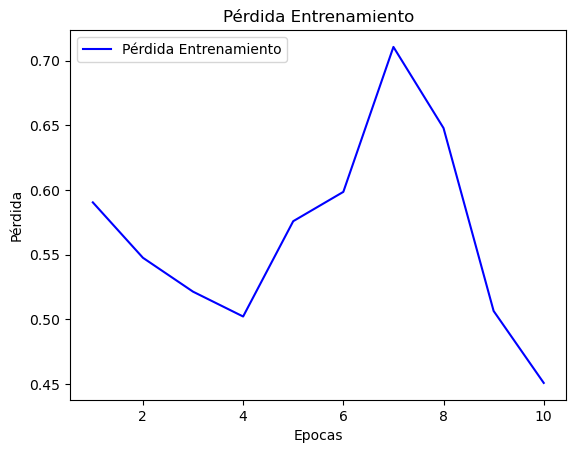

In [195]:
# Se gráfica la evolución de la pérdida durante el entrenamiento
perdida_train = historia.history['loss']
epocas = range(1, len(perdida_train) + 1)

# Gráfico de pérdida de entrenamiento y validación

plt.plot(epocas, perdida_train, 'b', label='Pérdida Entrenamiento')
plt.title('Pérdida Entrenamiento')
plt.xlabel('Epocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


### Cálculo de las metricas de precisión y matriz de confusión para modelos de convulsión en 1D y redes recurrentes (RNN)

1/1 [==============================] - 1s 725ms/step
Precisión: 0.13043478260869565
Matriz de confusión:
[[1 0 0 1 0 3 0]
 [1 0 0 2 0 0 0]
 [0 0 0 5 0 0 0]
 [0 0 0 2 0 0 0]
 [0 1 0 0 0 3 0]
 [0 0 0 2 0 0 0]
 [0 0 0 2 0 0 0]]
Precisión del modelo: 13.04%


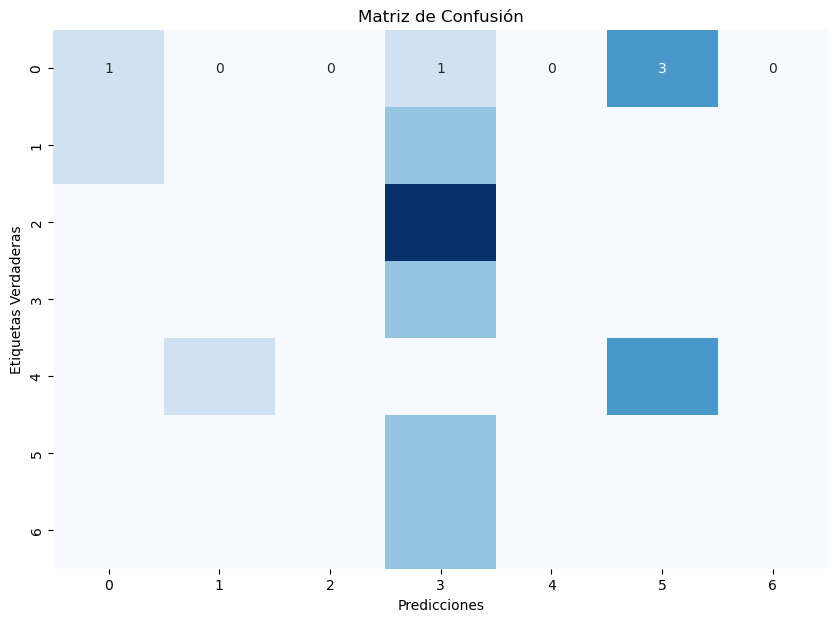

In [187]:
# Calculo de la métricas de precisión y matriz de confusión RNN

# Realizar predicciones con el modelo
# Para clasificación multiclase con softmax, model.predict devuelve las probabilidades de cada clase
predicciones_probabilidades = model.predict(X_test)
# Convertir las probabilidades en etiquetas predichas tomando la clase con la mayor probabilidad
predicciones_etiquetas = np.argmax(predicciones_probabilidades, axis=1)

# Si tus etiquetas verdaderas (y_test) están en formato one-hot, también necesitas convertirlas a etiquetas enteras
etiquetas_verdaderas = np.argmax(y_test, axis=1)

# Cálculo de la precisión
precision = accuracy_score(etiquetas_verdaderas, predicciones_etiquetas)
print(f'Precisión: {precision}')

# Cálculo de la matriz de confusión
matriz_confusion = confusion_matrix(etiquetas_verdaderas, predicciones_etiquetas)
print('Matriz de confusión:')
print(matriz_confusion)

# Accuracy of the predicted values
print(f'Precisión del modelo: {precision * 100:.2f}%')

# visualize the confusion matrix in a heat map
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')
plt.show()


## Resultados

### Modelo Simple RNN
- Utilizando el método con 2 capas, una de 100 neuronas, otra de 50 neuronas y una capa densa de 7, un error cuadrático del 1,0433, para una precisión del modelo del 39,13%.
- Utilizando el método con 2 capas, una de 50 neuronas, otra de 50 neuronas y una capa densa de 7, un error cuadrático del 0,4926, para una precisión del modelo del 39,13%.
- Utilizando el método con 3 capas, una de 100 neuronas, otra de 50 neuronas, y otra de 25 neuronas, y una capa densa de 7, un error cuadrático del 0,920, para una precisión del modelo del 47,83%.
- Utilizando el método con 3 capas, una de 50 neuronas, otra de 50 neuronas, y otra de 50 neuronas, y una capa densa de 7, un error cuadrático del 0,746, para una precisión del modelo del 34,78%.

### Modelo LSTM
- Utilizando el método con 3 capas, una de 100 neuronas, otra de 50 neuronas, y 25 neuronas y una capa densa de 7, un error cuadrático del 0,1980, para una precisión del modelo del 21,74%.
- Utilizando el método con 3 capas, una de 50 neuronas, otra de 50 neuronas, y 50 neuronas y una capa densa de 7, un error cuadrático del 0,127, para una precisión del modelo del 82,61%.

### Conclusiones
- Aplicando el modelo simple RNN para datos recurrentes, la mejor distribución es de tres capas, la primera capa con 100 neuronas, la segunda con 50 neuronas, y la tercera con 25 neuronas, y la capa densa de 7.
- Aplicando el modelo LSTM para datos recurrentes, la mejor distribución es de tres capas, la primera con 50 neuronas, la segunda con 50 neuronas y la tercera con 50 neuronas y una capa densa de 7.
- Utilizando diferentes distribuciones con el método RNN para datos recurrentes, la precisión del modelo no pasa del 50%.
- La variaciones de la aplicación de los modelos con las mismas capas y neuronas por capa, depende de la selección de los datos de prueba, por lo que son aleatorios en cada proceso.
- Lo anterior puede tener diferentes factores, entre ellos la calidad del dataset, otra la forma cómo de utiliza la obtención de los datos a través del acelerómetro, como quiera que se tienen tres coordenadas que dependen de la ubicación del equipo celular al momento de obtener los datos.


## Referencias

Bai, K. (11 de febrero de 2019). A Comprehensive Introduction to Different Types of Convolutions in Deep Learning: https://towardsdatascience.com/a-comprehensive-introduction-to-different-types-of-convolutions-in-deep-learning-669281e58215

Britz, D. (17 de septiembre de 2015). dennybritz.com. Recurrent Neural Networks Tutorial, Part 1 – Introduction to RNNs: https://dennybritz.com/posts/wildml/recurrent-neural-networks-tutorial-part-1/

Chollet, F. (2021). Deep Learning with Python. Manning Publications Co. https://books.google.com.co/books?id=XHpKEAAAQBAJ&printsec=frontcover&hl=es&source=gbs_ge_summary_r&cad=0#v=onepage&q&f=false

Chollet, F. (25 de junio de 2023). keras.io. The Sequential model: https://keras.io/guides/sequential_model/

Olah, C. (27 de agosto de 2015). colah.github.io. Understanding LSTM Networks: https://colah.github.io/posts/2015-08-Understanding-LSTMs/

Raschka, S., & Mirjalili, V. (2017). Python Mchine Learning, Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow. Packt Publishing Ltd. http://radio.eng.niigata-u.ac.jp/wp/wp-content/uploads/2020/06/python-machine-learning-2nd.pdf

Tensorflow. (15 de abril de 2024). tensorflow.org. Introducción a módulos, capas y modelos: https://www.tensorflow.org/guide/intro_to_modules?hl=es

